In [1]:
from collections import defaultdict
from conceptnet import ConceptNet
import utils

wrapper = ConceptNet()
huric_utils = utils.HuricUtils()
language_utils = utils.LanguageUtils('en')
graph_utils = utils.GraphUtils()

['/c/en/book', '/c/en/towel', '/c/en/mug', '/c/en/bed']
all types ['/c/en/area/n', '/c/en/army_unit/n', '/c/en/book', '/c/en/chemical/n', '/c/en/collection/n', '/c/en/commercial_enterprise/n', '/c/en/communication/n', '/c/en/consequence/n', '/c/en/creation/n', '/c/en/group/n', '/c/en/music/n', '/c/en/musical_organization/n', '/c/en/part/n', '/c/en/product/n', '/c/en/publication/n', '/c/en/quantity/n', '/c/en/section/n', '/c/en/segment/n', '/c/en/slice/n', '/c/en/square_mile/n', '/c/en/team/n', '/c/en/work/n', '/c/en/writing/n']
all types ['/c/en/fabric/n', '/c/en/piece_of_cloth/n', '/c/en/towel']
all types ['/c/en/containerful/n', '/c/en/indefinite_quantity/n', '/c/en/mug']
all types ['/c/en/artifact/n', '/c/en/aspect/n', '/c/en/bed', '/c/en/boundary/n', '/c/en/chart/n', '/c/en/education/n', '/c/en/financial_institution/n', '/c/en/foundation/n', '/c/en/geological_formation/n', '/c/en/layer/n', '/c/en/natural_depression/n', '/c/en/plot/n', '/c/en/relation/n', '/c/en/scheme/n', '/c/en/st

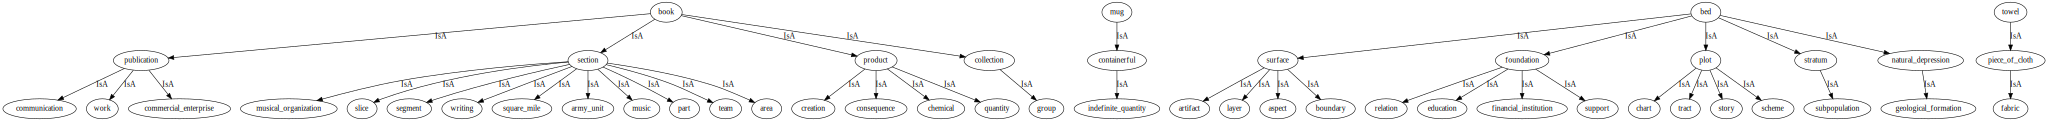

In [2]:
things = ['book', 'bath towel', 'coffee mug', 'bed']
things = [language_utils.semantic_head_lemmatize(el) for el in things]
things = [wrapper.get_id(el) for el in things]
print(things)
# follow triples [current_words], IsA, ?
all_edges = set()
for w in things:
    all_types, edges = wrapper.get_isa_tree(w)
    print('all types', sorted(all_types))
    all_edges.update(edges)

graph_utils.create_graph(all_edges, wrapper.get_name)

In [3]:
frame_elements = huric_utils.get_frame_elements_values('Theme')
frame_lemmas = set()
for el in frame_elements:
    lemma = language_utils.semantic_head_lemmatize(el)
    #print(el, ':', lemma)
    frame_lemmas.add(lemma)
frame_lemmas = sorted(frame_lemmas)

apple /c/en/apple ['/c/en/apple', '/c/en/apple_tree/n', '/c/en/fruit/n', '/c/en/pome/n']
aspirin /c/en/aspirin ['/c/en/aspirin', '/c/en/nonsteroidal_anti_inflammatory/n', '/c/en/salicylate/n', '/c/en/salt/n']
bag /c/en/bag ['/c/en/bag', '/c/en/baggage/n', '/c/en/case/n', '/c/en/container/n', '/c/en/containerful/n', '/c/en/indefinite_quantity/n', '/c/en/instrumentality/n', '/c/en/materiel/n', '/c/en/measure/n', '/c/en/unpleasant_person/n', '/c/en/unpleasant_woman/n', '/c/en/woman/n']
be /c/en/be ['/c/en/be']
bed /c/en/bed ['/c/en/artifact/n', '/c/en/aspect/n', '/c/en/bed', '/c/en/boundary/n', '/c/en/chart/n', '/c/en/education/n', '/c/en/financial_institution/n', '/c/en/foundation/n', '/c/en/geological_formation/n', '/c/en/layer/n', '/c/en/natural_depression/n', '/c/en/plot/n', '/c/en/relation/n', '/c/en/scheme/n', '/c/en/story/n', '/c/en/stratum/n', '/c/en/subpopulation/n', '/c/en/support/n', '/c/en/surface/n', '/c/en/tract/n']
beer /c/en/beer ['/c/en/alcohol/n', '/c/en/beer', '/c/en/br

mayo /c/en/mayo ['/c/en/mayo']
message /c/en/message ['/c/en/abstraction/n', '/c/en/act/n', '/c/en/communication/n', '/c/en/connection/n', '/c/en/message']
milk /c/en/milk ['/c/en/body_substance/n', '/c/en/food/n', '/c/en/foodstuff/n', '/c/en/liquid_body_substance/n', '/c/en/milk', '/c/en/nutriment/n']
mobile /c/en/mobile ['/c/en/mobile']
mug /c/en/mug ['/c/en/containerful/n', '/c/en/indefinite_quantity/n', '/c/en/mug']
mustard /c/en/mustard ['/c/en/crucifer/n', '/c/en/cruciferous_vegetable/n', '/c/en/herb/n', '/c/en/mustard', '/c/en/vegetable/n']
napkin /c/en/napkin ['/c/en/linen/n', '/c/en/napkin', '/c/en/table_linen/n']
newspaper /c/en/newspaper ['/c/en/article/n', '/c/en/chemical/n', '/c/en/clamp/n', '/c/en/consequence/n', '/c/en/creation/n', '/c/en/estate/n', '/c/en/firm/n', '/c/en/machine/n', '/c/en/material/n', '/c/en/medium/n', '/c/en/newspaper', '/c/en/owner/n', '/c/en/paper/n', '/c/en/press/n', '/c/en/print_media/n', '/c/en/product/n', '/c/en/professional/n', '/c/en/publisher

yogurt /c/en/yogurt ['/c/en/content/n', '/c/en/food/n', '/c/en/solid/n', '/c/en/substance/n', '/c/en/yogurt']


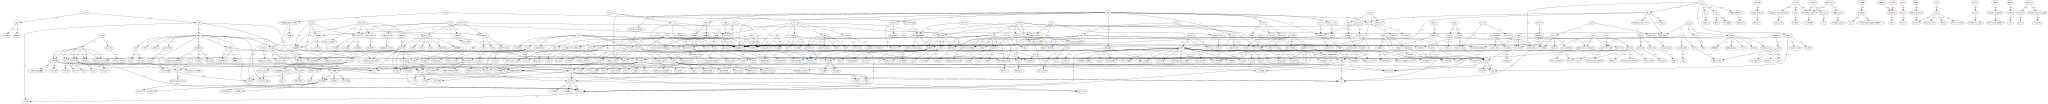

In [4]:
all_hypernyms = defaultdict(lambda: 0)
all_edges = set()
for w in frame_lemmas:
    id = wrapper.get_id(w)
    hypernyms, edges = wrapper.get_isa_tree(id)
    print(w, id, sorted(hypernyms))
    for w in hypernyms:
        all_hypernyms[w] += 1
    all_edges.update(edges)

graph_utils.create_graph(all_edges, wrapper.get_name)

In [5]:
sorted_hypernyms = sorted([(k,v) for k,v in all_hypernyms.items()], key=lambda el: el[1], reverse=True)
print(sorted_hypernyms)

[('/c/en/container/n', 18), ('/c/en/containerful/n', 16), ('/c/en/indefinite_quantity/n', 14), ('/c/en/instrumentality/n', 10), ('/c/en/artifact/n', 8), ('/c/en/food/n', 6), ('/c/en/communication/n', 5), ('/c/en/vessel/n', 5), ('/c/en/substance/n', 5), ('/c/en/act/n', 5), ('/c/en/solid/n', 5), ('/c/en/covering/n', 5), ('/c/en/layer/n', 4), ('/c/en/part/n', 4), ('/c/en/consequence/n', 4), ('/c/en/craft/n', 4), ('/c/en/tube/n', 4), ('/c/en/tableware/n', 4), ('/c/en/medium/n', 4), ('/c/en/support/n', 3), ('/c/en/natural_depression/n', 3), ('/c/en/plot/n', 3), ('/c/en/quantity/n', 3), ('/c/en/product/n', 3), ('/c/en/work/n', 3), ('/c/en/creation/n', 3), ('/c/en/chemical/n', 3), ('/c/en/publication/n', 3), ('/c/en/structure/n', 3), ('/c/en/foodstuff/n', 3), ('/c/en/machine/n', 3), ('/c/en/device/n', 3), ('/c/en/natural_object/n', 3), ('/c/en/activity/n', 3), ('/c/en/abstraction/n', 3), ('/c/en/tool/n', 3), ('/c/en/cleansing_agent/n', 3), ('/c/en/formulation/n', 3), ('/c/en/line/n', 3), ('/c